# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## DODGECOIN 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [4]:
vader_textblob_dogecoin_train_data = pd.read_csv('vader_textblob_dogecoin_train_data').drop('Unnamed: 0',axis=1)
flair_dogecoin_train_data = pd.read_csv('flair_dogecoin_train_data.csv').drop('Unnamed: 0',axis=1)
dogecoin_train_data = pd.read_csv('dogecoin_train_data').drop('Unnamed: 0',axis=1)
vader_textblob_dogecoin_test_data = pd.read_csv('vader_textblob_dogecoin_test_data').drop('Unnamed: 0',axis=1)
flair_dogecoin_test_data = pd.read_csv('flair_dogecoin_test_data.csv').drop('Unnamed: 0',axis=1)
dogecoin_test_data = pd.read_csv('dogecoin_test_data').drop('Unnamed: 0',axis=1)

In [5]:
gfmodel = Greed_Fear_Model(dogecoin_train_data,dogecoin_test_data)

In [6]:
coin =  gfmodel.coin_data_load('dogecoin')

  0%|          | 0/3077 [00:00<?, ?it/s]

In [7]:
gfmodel.convert_train_data(vader_textblob_dogecoin_train_data,flair_dogecoin_train_data)

(15894, 11)
(15894, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/15894 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-12,17739,14.1208,0.079779,10.242964,0.057870,-37.854893,-0.213869,217463,1228.604520,...,0.1381,1.214106e+09,1.831869e+10,2022-04-13,0.1381,0.1426,0.1371,0.1401,8.907287e+08,1.858458e+10
1,2022-04-13,182997,189.5822,0.106867,152.459704,0.085941,-253.023068,-0.142629,1450511,817.649944,...,0.1401,8.907287e+08,1.858458e+10,2022-04-14,0.1401,0.1466,0.1381,0.1439,1.759068e+09,1.909399e+10
2,2022-04-14,182869,236.5352,0.125151,154.855179,0.081934,-438.536462,-0.232030,2630211,1391.646032,...,0.1439,1.759068e+09,1.909399e+10,2022-04-15,0.1439,0.1493,0.1428,0.1460,1.140382e+09,1.937341e+10
3,2022-04-15,190464,234.0526,0.125767,165.769856,0.089076,-303.846897,-0.163271,1900574,1021.264911,...,0.1460,1.140382e+09,1.937341e+10,2022-04-16,0.1460,0.1478,0.1421,0.1437,5.840192e+08,1.906640e+10
4,2022-04-16,159562,167.7824,0.103826,139.065006,0.086055,-226.990392,-0.140464,1716719,1062.326114,...,0.1437,5.840192e+08,1.906640e+10,2022-04-17,0.1437,0.1447,0.1390,0.1395,6.364423e+08,1.850213e+10
5,2022-04-17,130056,184.3840,0.139158,138.102543,0.104228,-85.701083,-0.064680,1387861,1047.442264,...,0.1395,6.364423e+08,1.850213e+10,2022-04-18,0.1395,0.1405,0.1344,0.1403,9.097185e+08,1.861181e+10
6,2022-04-18,163521,204.3191,0.131819,128.483037,0.082892,-103.697280,-0.066901,1552419,1001.560645,...,0.1403,9.097185e+08,1.861181e+10,2022-04-19,0.1403,0.1441,0.1395,0.1427,6.795116e+08,1.892747e+10
7,2022-04-19,150495,192.3466,0.126627,132.577132,0.087279,-215.517629,-0.141881,1837956,1209.977617,...,0.1427,6.795116e+08,1.892747e+10,2022-04-20,0.1427,0.1462,0.1396,0.1409,1.068542e+09,1.869044e+10
8,2022-04-20,104473,132.6950,0.128084,97.646600,0.094253,-108.214243,-0.104454,1194542,1153.032819,...,0.1409,1.068542e+09,1.869044e+10,2022-04-21,0.1409,0.1424,0.1353,0.1364,7.405498e+08,1.809169e+10
9,2022-04-21,64522,93.9291,0.133993,54.600692,0.077890,-96.211317,-0.137249,629697,898.283880,...,0.1364,7.405498e+08,1.809169e+10,2022-04-22,0.1364,0.1379,0.1350,0.1364,5.052513e+08,1.809563e+10


In [8]:
gfmodel.convert_test_data(vader_textblob_dogecoin_test_data,flair_dogecoin_test_data)

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/6725 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-28,5409,-0.9783,-0.021740,-1.074747,-0.023883,-13.759600,-0.305769,188733,4194.066667,...,0.13740,1.105138e+09,1.822400e+10,2022-04-29,0.13740,0.14460,0.13410,0.13500,1.555397e+09,1.791417e+10
1,2022-04-29,15749,10.5793,0.082010,10.319078,0.079993,-72.637208,-0.563079,510706,3958.961240,...,0.13500,1.555397e+09,1.791417e+10,2022-04-30,0.13500,0.13650,0.12620,0.12760,9.166121e+08,1.692314e+10
2,2022-04-30,9267,8.1045,0.101306,11.566069,0.144576,-27.255483,-0.340694,81611,1020.137500,...,0.12760,9.166121e+08,1.692314e+10,2022-05-01,0.12760,0.13480,0.12750,0.13280,9.917108e+08,1.761503e+10
3,2022-05-01,15205,18.2574,0.143759,14.758333,0.116207,-60.514418,-0.476491,321382,2530.566929,...,0.13280,9.917108e+08,1.761503e+10,2022-05-02,0.13280,0.13380,0.12830,0.13090,7.690627e+08,1.737164e+10
4,2022-05-02,17886,14.3678,0.099776,8.964907,0.062256,-8.764110,-0.060862,270489,1878.395833,...,0.13090,7.690627e+08,1.737164e+10,2022-05-03,0.13090,0.13180,0.12740,0.12950,5.557065e+08,1.718353e+10
5,2022-05-03,5035,11.8341,0.257263,6.344003,0.137913,-18.917727,-0.411255,114466,2488.391304,...,0.12950,5.557065e+08,1.718353e+10,2022-05-04,0.12950,0.13580,0.12930,0.13580,8.380506e+08,1.801785e+10
6,2022-05-04,6221,6.5041,0.125079,7.154825,0.137593,-30.537250,-0.587255,43215,831.057692,...,0.13580,8.380506e+08,1.801785e+10,2022-05-05,0.13580,0.13730,0.12670,0.12840,1.258066e+09,1.703884e+10
7,2022-05-05,4914,6.4752,0.157932,5.668687,0.138261,-12.139999,-0.296098,246941,6022.951220,...,0.12840,1.258066e+09,1.703884e+10,2022-05-06,0.12840,0.12930,0.12460,0.12790,8.390060e+08,1.696866e+10
8,2022-05-06,7732,12.9851,0.220086,7.517989,0.127424,-24.891664,-0.421893,180541,3060.016949,...,0.12790,8.390060e+08,1.696866e+10,2022-05-07,0.12790,0.13190,0.12540,0.12750,7.463832e+08,1.691977e+10
9,2022-05-07,23229,26.5211,0.117872,21.069144,0.093641,-44.942277,-0.199743,254834,1132.595556,...,0.12750,7.463832e+08,1.691977e+10,2022-05-08,0.12750,0.12800,0.12400,0.12420,7.289532e+08,1.647866e+10


In [9]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-0.938485,-1.123182,-2.358233,-1.131889,-2.757065,0.946706,0.040483,-0.845861,1.441560,-0.832456,...,1.014252,-0.206595,1.012121,1.014545,1.245637,1.068677,1.018473,0.566270,1.019342,2022-04-28
1,-0.658008,-0.815224,-0.605542,-0.731220,-0.260110,0.277802,-1.771798,-0.112447,1.278018,-0.818346,...,0.892584,0.536860,0.893738,0.892907,0.809388,0.706875,0.645890,-0.461941,0.643323,2022-04-29
2,-0.833835,-0.881166,-0.279564,-0.687369,1.292325,0.793380,-0.205498,-1.089872,-0.766258,-0.094017,...,0.517444,-0.517882,0.515083,0.517856,0.717830,0.766412,0.907705,-0.341059,0.905843,2022-04-30
3,-0.672764,-0.610636,0.437608,-0.575111,0.610408,0.415528,-1.161946,-0.543703,0.284412,-0.781012,...,0.781056,-0.393881,0.779444,0.781405,0.663972,0.803050,0.812042,-0.699441,0.813495,2022-05-01
4,-0.600041,-0.714277,-0.305409,-0.778840,-0.686458,1.003460,1.765405,-0.659631,-0.169245,-0.762051,...,0.684736,-0.761510,0.686448,0.685108,0.556256,0.761832,0.741553,-1.042867,0.742120,2022-05-02
5,-0.948630,-0.781789,2.355076,-0.871005,1.132167,0.888105,-0.702474,-1.015032,0.255074,-0.848477,...,0.613764,-1.113797,0.614573,0.614153,0.771688,0.848848,1.058752,-0.588396,1.058681,2022-05-03
6,-0.916459,-0.923810,0.122036,-0.842492,1.124467,0.756096,-1.942071,-1.177333,-0.897784,-0.844509,...,0.933140,-0.647600,0.933354,0.933453,0.852474,0.729774,0.686169,0.087676,0.687222,2022-05-04
7,-0.951912,-0.924580,0.677032,-0.894753,1.140521,0.965106,0.108600,-0.713271,2.713751,-0.837453,...,0.557999,0.045917,0.559290,0.558402,0.421612,0.633598,0.660994,-0.586858,0.660594,2022-05-05
8,-0.875473,-0.751120,1.727037,-0.829721,0.880021,0.820236,-0.777397,-0.864522,0.652703,-0.786157,...,0.532652,-0.646022,0.532475,0.533061,0.561642,0.670237,0.640855,-0.735947,0.642046,2022-05-06
9,-0.455109,-0.390445,0.000280,-0.353189,0.067953,0.592442,0.787238,-0.695291,-0.688031,-0.228065,...,0.512374,-0.798958,0.513797,0.512788,0.351597,0.606120,0.474703,-0.764003,0.474678,2022-05-07


In [10]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
gfmodel.make_model()

In [12]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,0.129738,0.13500,2022-04-28,1.105138e+09,0.13740,2022-04-29,-17.467249,-0.007662,True
1,0.130055,0.12760,2022-04-29,1.555397e+09,0.13500,2022-04-30,-54.814815,-0.004945,True
2,0.122910,0.13280,2022-04-30,9.166121e+08,0.12760,2022-05-01,40.752351,-0.004690,False
3,0.128708,0.13090,2022-05-01,9.917108e+08,0.13280,2022-05-02,-14.307229,-0.004092,True
4,0.124874,0.12950,2022-05-02,7.690627e+08,0.13090,2022-05-03,-10.695187,-0.006026,True
5,0.127232,0.13580,2022-05-03,5.557065e+08,0.12950,2022-05-04,48.648649,-0.002268,False
6,0.131512,0.12840,2022-05-04,8.380506e+08,0.13580,2022-05-05,-54.491900,-0.004288,True
7,0.124332,0.12790,2022-05-05,1.258066e+09,0.12840,2022-05-06,-3.894081,-0.004068,True
8,0.125266,0.12750,2022-05-06,8.390060e+08,0.12790,2022-05-07,-3.127443,-0.002634,True
9,0.122577,0.12420,2022-05-07,7.463832e+08,0.12750,2022-05-08,-25.882353,-0.004923,True


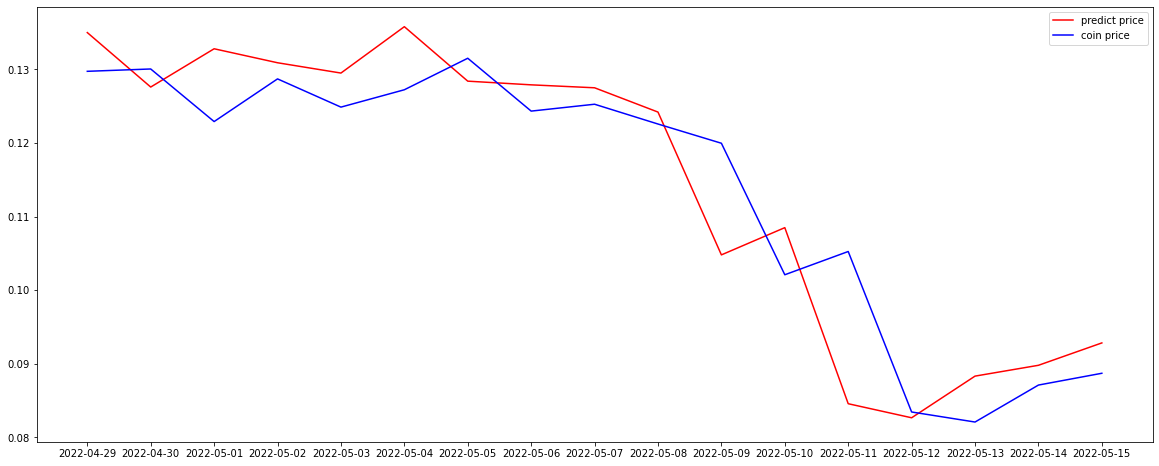

In [13]:
gfmodel.visualize()

In [14]:
result.to_csv('DOGECOIN_result_data')

In [15]:
gfmodel.save_csv('DOGECOIN_Visulize_data.csv')